<a target="_blank" href="https://colab.research.google.com/github/younggon2/Education-ComputerVision-DeepLearning/blob/master/SAM_tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Segment Anything  
  
**SAM(Segment Anything Model)**은 점이나 상자와 같은 입력 prompt에서 객체 마스크를 예측하며 이미지의 모든 객체에 대한 마스크를 생성하는 데 사용할 수 있습니다. 1,100만 개의 이미지와 11억 개의 마스크로 구성된 데이터 세트 에 대해 훈련되었으며 다양한 분할 작업에서 강력한 제로샷 성능을 발휘합니다. 이 모델은 이미지나 비디오에 있는 여러 객체들을 정확하게 인식하고 분할하여 각 객체의 경계를 명확하게 파악할 수 있습니다.  

![대체 텍스트](https://github.com/facebookresearch/segment-anything/raw/main/assets/model_diagram.png?raw=true)
<!-- ![대체 텍스트](https://github.com/facebookresearch/segment-anything/raw/main/assets/notebook1.png?raw=true) -->

SAM(Segmentation Anything Model)은 자연 영상 분할에서 놀라운 다양성과 성능을 보여주었으며, 의료 영상 분할에 적용하기 위해 fine-tuning되어 사용되고 있습니다.   


----------

## Environment Set-up

Installation : python>=3.8, pytorch>=1.7, torchvision>=0.8    
  
  
> SAM github : https://github.com/facebookresearch/segment-anything.git  
> MedSAM github : https://github.com/bowang-lab/MedSAM.git

In [ ]:
!pip install git+https://github.com/bowang-lab/MedSAM.git

In [ ]:
# download SAM model

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
# !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2024-04-03 00:46:25--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.7.82, 13.35.7.38, 13.35.7.128, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.7.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth.1’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M   114MB/s    in 3.1s    

2024-04-03 00:46:28 (114 MB/s) - ‘sam_vit_b_01ec64.pth.1’ saved [375042383/375042383]



In [ ]:
!wget https://raw.githubusercontent.com/bowang-lab/MedSAM/main/utils/demo.py

--2024-04-03 00:46:31--  https://raw.githubusercontent.com/bowang-lab/MedSAM/main/utils/demo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20383 (20K) [text/plain]
Saving to: ‘demo.py.1’

demo.py.1           100%[===================>]  19.91K  --.-KB/s    in 0.006s  

2024-04-03 00:46:31 (3.14 MB/s) - ‘demo.py.1’ saved [20383/20383]



## Load Model

In [ ]:
# load sam model
from segment_anything import sam_model_registry
from demo import BboxPromptDemo
from google.colab import output

output.enable_custom_widget_manager()
# SAM_CKPT_PATH = "sam_vit_h_4b8939.pth"
SAM_CKPT_PATH = "sam_vit_b_01ec64.pth"

# device = "cuda:0"
sam_model = sam_model_registry['vit_b'](checkpoint=SAM_CKPT_PATH)
# sam_model = sam_model.to(device)
sam_model.eval()

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


## Load Data & Run Inference

- Button
  - clear : prompt 리셋
  - save : mask 저장

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# download demo image
url = "https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_640.jpg"

# curl 요청
os.system("curl " + url + " > test.jpg")

0

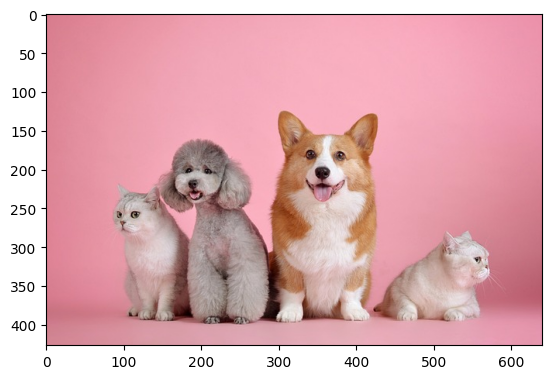

In [ ]:
# 데이터 확인
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.jpg") # 이미지 불러오기
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR이미지 > RGB변환

plt.imshow(img)
plt.show()

Button(description='clear', style=ButtonStyle())

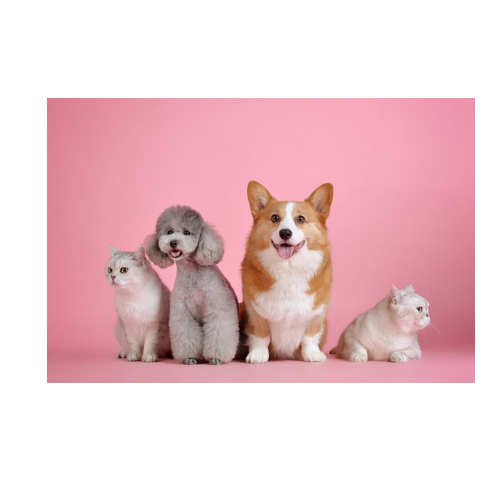

Button(description='save', style=ButtonStyle())

In [ ]:
%matplotlib widget

img = 'test.jpg'
bbox_prompt_demo = BboxPromptDemo(sam_model)
bbox_prompt_demo.show(img)

In [ ]:
# Mask 확인

import cv2
import matplotlib.pyplot as plt


mask = cv2.imread('segs.png') # 이미지 불러오기
mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY) # BGR이미지 > RGB변환
plt.imshow(mask,'gray')
plt.show()